# Crypto Portfolio Selection 

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import polars as pl
import polars.selectors as cs

# Load data

In [8]:
import pandas as pd
import yfinance as yf

tickers = [
        "BTC-USD",
        "ETH-USD",
        "USDT-USD",
        "USDC-USD",
        "BNB-USD",
        "SOL-USD",
        "XRP-USD",
        "STETH-USD",
    ]
data: pd.DataFrame = yf.download(
    tickers,
    start="2023-01-01",
    end="2024-01-01",
)["Close"].dropna()

[*********************100%***********************]  8 of 8 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

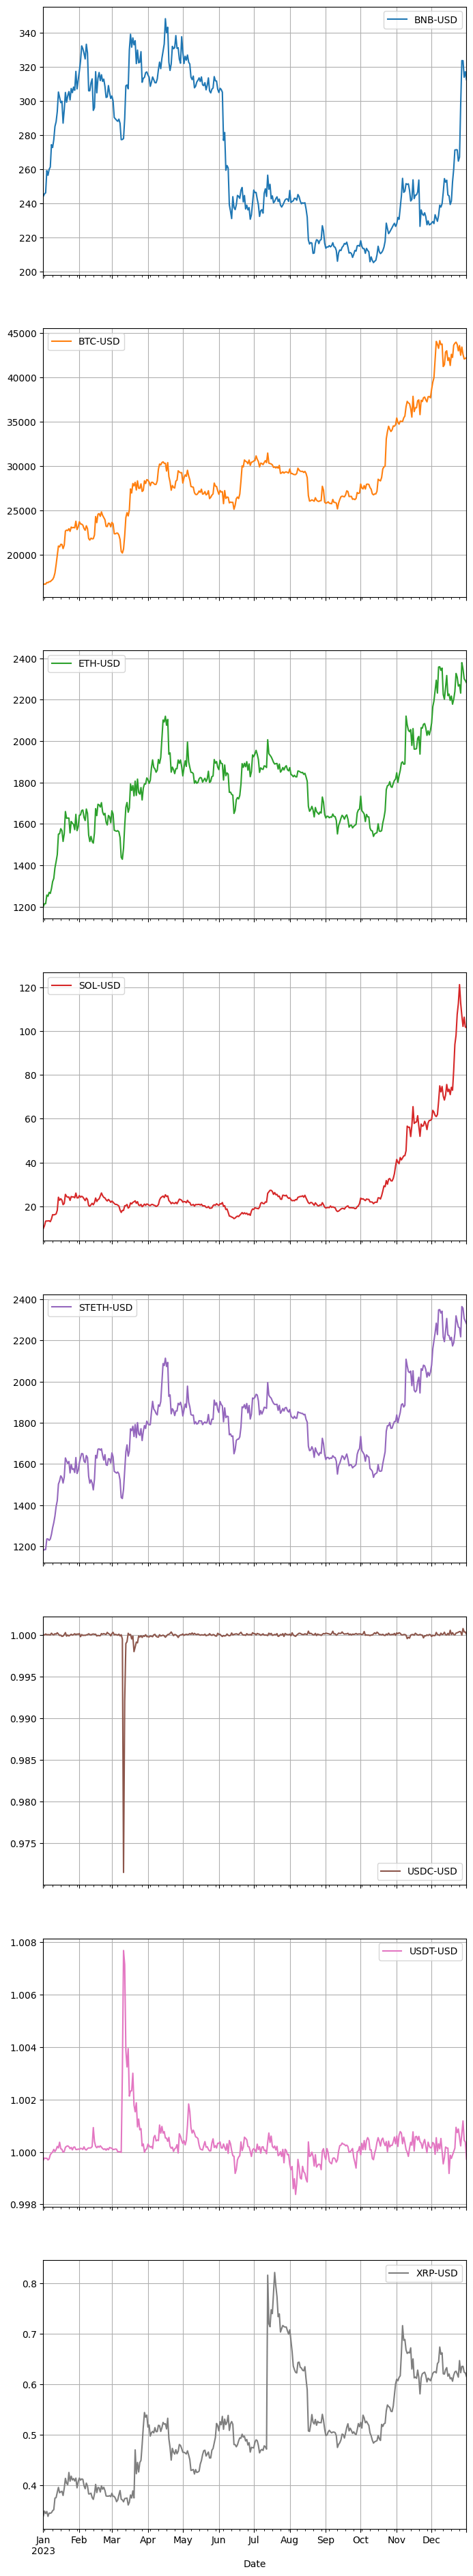

In [11]:
data.plot(grid=True, subplots=True, figsize=(8, 6*len(tickers)))

In [13]:
df_close = pl.from_dataframe(data.reset_index())
df_close

Date,BNB-USD,BTC-USD,ETH-USD,SOL-USD,STETH-USD,USDC-USD,USDT-USD,XRP-USD
"datetime[ns, UTC]",f64,f64,f64,f64,f64,f64,f64,f64
2023-01-01 00:00:00 UTC,244.136978,16625.080078,1200.964844,9.982173,1180.911499,0.999993,0.999692,0.338763
2023-01-02 00:00:00 UTC,245.535904,16688.470703,1214.656616,11.272967,1186.030396,0.999989,0.999771,0.348556
2023-01-03 00:00:00 UTC,246.133362,16679.857422,1214.778809,13.344046,1185.225464,1.000098,0.999759,0.343824
2023-01-04 00:00:00 UTC,259.11969,16863.238281,1256.526611,13.435113,1236.879639,1.000004,0.999763,0.347794
2023-01-05 00:00:00 UTC,256.422852,16836.736328,1250.438599,13.41933,1236.933472,1.000021,0.999697,0.338039
…,…,…,…,…,…,…,…,…
2023-12-27 00:00:00 UTC,323.677338,43442.855469,2378.73999,107.023796,2363.55835,0.999961,1.000695,0.634856
2023-12-28 00:00:00 UTC,323.598999,42627.855469,2347.566162,102.104568,2355.552734,1.000751,1.001186,0.634998
2023-12-29 00:00:00 UTC,313.878754,42099.402344,2300.690674,106.311516,2305.592773,1.000343,1.000449,0.623402


In [14]:
df_returns = (
    df_close 
    .select(
        cs.datetime(),
        cs.float().pct_change(),
    )
    .drop_nulls()
)
df_returns

Date,BNB-USD,BTC-USD,ETH-USD,SOL-USD,STETH-USD,USDC-USD,USDT-USD,XRP-USD
"datetime[ns, UTC]",f64,f64,f64,f64,f64,f64,f64,f64
2023-01-02 00:00:00 UTC,0.00573,0.003813,0.011401,0.12931,0.004335,-0.000004,0.000079,0.028908
2023-01-03 00:00:00 UTC,0.002433,-0.000516,0.000101,0.183721,-0.000679,0.000109,-0.000012,-0.013576
2023-01-04 00:00:00 UTC,0.052761,0.010994,0.034367,0.006825,0.043582,-0.000094,0.000004,0.011547
2023-01-05 00:00:00 UTC,-0.010408,-0.001572,-0.004845,-0.001175,0.000044,0.000017,-0.000066,-0.028048
2023-01-06 00:00:00 UTC,0.013432,0.006844,0.015147,0.007937,-0.005731,-0.000008,0.000041,0.019542
…,…,…,…,…,…,…,…,…
2023-12-27 00:00:00 UTC,0.087285,0.021694,0.065999,-0.05017,0.066168,-0.000396,0.000461,0.020064
2023-12-28 00:00:00 UTC,-0.000242,-0.01876,-0.013105,-0.045964,-0.003387,0.00079,0.000491,0.000224
2023-12-29 00:00:00 UTC,-0.030038,-0.012397,-0.019968,0.041202,-0.021209,-0.000408,-0.000736,-0.018262


# Offline portfolio

In [15]:
from potato.benchmark import best_kelly_portfolio


returns = jnp.array(
    df_returns.to_numpy()[:, 1:]
)

long_only = best_kelly_portfolio(returns)
long_short = best_kelly_portfolio(returns, short_selling=True)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [18]:
df_static_portfolio_return = (
    df_returns
    .select(
        CRP = pl.sum_horizontal([pl.col(col) / len(df_returns.columns[1:]) for col in df_returns.columns[1:]]),
        kelly_long_only = pl.sum_horizontal([pl.col(col) * weight for col, weight in zip(df_returns.columns[1:], long_only)]),
        kelly_long_short = pl.sum_horizontal([pl.col(col) * weight for col, weight in zip(df_returns.columns[1:], long_short)]),
    )
)
df_static_portfolio_return

CRP,kelly_long_only,kelly_long_short
f64,f64,f64
0.022946,0.12931,0.12931
0.021448,0.183721,0.183721
0.019998,0.006825,0.006825
-0.005757,-0.001175,-0.001175
0.007151,0.007937,0.007937
…,…,…
0.026388,-0.05017,-0.05017
-0.009994,-0.045964,-0.045964
-0.007727,0.041202,0.041202


optimal fixed porfolio

In [19]:
long_short

Array([0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Online portfolio

## Long/short portfolio

In [37]:
import optax
from potato.optimizer import egd
from potato.loss import kelly_loss

eta = 1e-2
optimizer = egd(learning_rate=eta)
opt_state = optimizer.init(returns[0])

In [38]:
@jax.jit
def step(params, rs, state):
    loss, grad = jax.value_and_grad(kelly_loss)(params, rs)
    updates, state = optimizer.update(grad, state, params)
    params = optax.apply_updates(params, updates)
    return params, state, loss

params = jnp.ones(returns.shape[1]) / returns.shape[1]
weights = []
for i in range(returns.shape[0]):
    weights.append(params)
    params, opt_state, loss = step(params, returns[i], opt_state)
    # print(f"Step {i}: loss={loss}, params={params}")

weights = np.array(weights)

In [39]:
df_portfolio_return = df_static_portfolio_return.with_columns(
    PGD=pl.Series(values=np.sum(weights * np.array(returns), axis=-1))
)

In [40]:
df_portfolio_return

CRP,kelly_long_only,kelly_long_short,PGD
f64,f64,f64,f32
0.022946,0.12931,0.12931,0.022946
0.021448,0.183721,0.183721,0.021471
0.019998,0.006825,0.006825,0.019995
-0.005757,-0.001175,-0.001175,-0.005757
0.007151,0.007937,0.007937,0.00715
…,…,…,…
0.026388,-0.05017,-0.05017,0.026401
-0.009994,-0.045964,-0.045964,-0.00999
-0.007727,0.041202,0.041202,-0.00773


In [41]:
df_sharpes = (
    df_portfolio_return
    .select(cs.numeric().mean() / cs.numeric().std() * jnp.sqrt(252))
)
df_sharpes

CRP,kelly_long_only,kelly_long_short,PGD
f64,f64,f64,f32
1.873533,2.345755,2.345755,1.873384


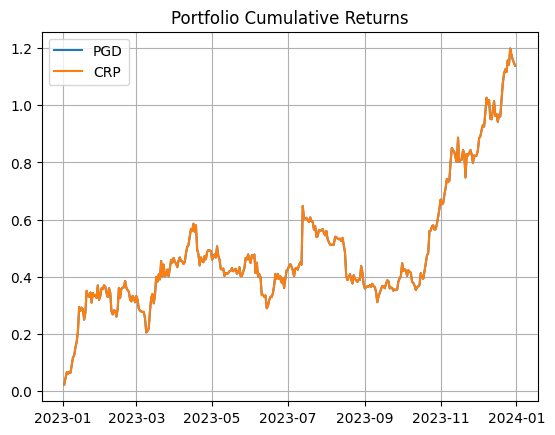

In [43]:
df_portfolio_cumret = (
    df_portfolio_return
    .select(cs.datetime(), cs.numeric().add(1).cum_prod().sub(1))
)

import matplotlib.pyplot as plt

plt.plot(df_returns["Date"], df_portfolio_cumret["PGD"], label="PGD")
plt.plot(df_returns["Date"], df_portfolio_cumret["CRP"], label="CRP")
# plt.plot(df_returns["Date"], df_portfolio_cumret["kelly_long_only"], label="kelly_long_only", linestyle="--", alpha=0.4)
# plt.plot(df_returns["Date"], df_portfolio_cumret["kelly_long_short"], label="kelly_long_short", linestyle="--", alpha=0.4)
# plt.plot(df_returns["Date"], df_portfolio_return["BTC-USD"], label="BTC-USD", linestyle="--", alpha=0.5)
# plt.plot(df_returns["Date"], df_portfolio_return["ETH-USD"], label="ETH-USD", linestyle="--", alpha=0.5)
plt.legend()
plt.grid()
plt.title("Portfolio Cumulative Returns")
plt.show()